## Cleaning and EDA on SBA Data

In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Getting data
data = pd.read_excel('naics.xlsx',sheet_name='table_of_size_standards-all')

In [6]:
data.head()

,NAICS Codes,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,Footnotes
0,NaN,"Sector 11 – Agriculture, Forestry, Fishing and...",NaN,NaN,NaN
1,Subsector 111 – Crop Production,NaN,NaN,NaN,NaN
2,111110,Soybean Farming,2,NaN,NaN
3,111120,Oilseed (except Soybean) Farming,2,NaN,NaN
4,111130,Dry Pea and Bean Farming,2.5,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NAICS Codes                             1082 non-null   object 
 1   NAICS Industry Description              1019 non-null   object 
 2   Size standards 
in millions of dollars  513 non-null    object 
 3   Size standards in number of employees   483 non-null    float64
 4   Footnotes                               37 non-null     object 
dtypes: float64(1), object(4)
memory usage: 43.3+ KB


In [8]:
#checking for null
data.isnull().sum()

NAICS Codes                                  23
NAICS Industry Description                   86
Size standards \nin millions of dollars     592
Size standards in number of employees       622
Footnotes                                  1068
dtype: int64

In [12]:
data = data [data['NAICS Codes'].isnull()]
data['LookupCodes'] = data['NAICS Industry Description'].str.slice(start = 7, stop = 9)

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_3936\2649663561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LookupCodes'] = data['NAICS Industry Description'].str.slice(start = 7, stop = 9)


In [13]:
data.head()

,NAICS Codes,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,Footnotes,LookupCodes
0,NaN,"Sector 11 – Agriculture, Forestry, Fishing and...",NaN,NaN,NaN,11
71,NaN,"Sector 21 – Mining, Quarrying, and Oil and Gas...",NaN,NaN,NaN,21
96,NaN,Sector 22 – Utilities,NaN,NaN,NaN,22
112,NaN,Sector 23 – Construction,NaN,NaN,NaN,23
149,NaN,Sector 31 – 33 – Manufacturing,NaN,NaN,NaN,31


In [14]:
data['NAICS Industry Description'].str.len()

0        54
71       57
96       21
112      24
149      30
517      27
518     537
591      29
592     537
659      47
729      23
765      33
804      46
836      59
893      51
897      84
945      32
965      45
1009     46
1038     43
1056     57
1103     33
1104    284
Name: NAICS Industry Description, dtype: int64

In [15]:
data['Sector'] = data['NAICS Industry Description'].str.slice(start = 12, stop = 538)

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_3936\4027759782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sector'] = data['NAICS Industry Description'].str.slice(start = 12, stop = 538)


In [16]:
data.head()

,NAICS Codes,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,Footnotes,LookupCodes,Sector
0,NaN,"Sector 11 – Agriculture, Forestry, Fishing and...",NaN,NaN,NaN,11,"Agriculture, Forestry, Fishing and Hunting"
71,NaN,"Sector 21 – Mining, Quarrying, and Oil and Gas...",NaN,NaN,NaN,21,"Mining, Quarrying, and Oil and Gas Extraction"
96,NaN,Sector 22 – Utilities,NaN,NaN,NaN,22,Utilities
112,NaN,Sector 23 – Construction,NaN,NaN,NaN,23,Construction
149,NaN,Sector 31 – 33 – Manufacturing,NaN,NaN,NaN,31,33 – Manufacturing


In [17]:
data = data [['NAICS Industry Description', 'LookupCodes', 'Sector']]

In [18]:
data.head()

,NAICS Industry Description,LookupCodes,Sector
0,"Sector 11 – Agriculture, Forestry, Fishing and...",11,"Agriculture, Forestry, Fishing and Hunting"
71,"Sector 21 – Mining, Quarrying, and Oil and Gas...",21,"Mining, Quarrying, and Oil and Gas Extraction"
96,Sector 22 – Utilities,22,Utilities
112,Sector 23 – Construction,23,Construction
149,Sector 31 – 33 – Manufacturing,31,33 – Manufacturing


In [19]:
data = data[data['LookupCodes'].str.isnumeric()]

In [20]:
# replacing some values in sector
data.loc[ data['Sector'] == '33 – Manufacturing', 'Sector'] = 'Manufacturing'

In [21]:
data.head()

,NAICS Industry Description,LookupCodes,Sector
0,"Sector 11 – Agriculture, Forestry, Fishing and...",11,"Agriculture, Forestry, Fishing and Hunting"
71,"Sector 21 – Mining, Quarrying, and Oil and Gas...",21,"Mining, Quarrying, and Oil and Gas Extraction"
96,Sector 22 – Utilities,22,Utilities
112,Sector 23 – Construction,23,Construction
149,Sector 31 – 33 – Manufacturing,31,Manufacturing


In [22]:
 data['Sector'] = np.where(data['Sector'] == '45 – Retail Trade', 'Retail Trade', data['Sector'])
data['Sector'] = np.where(data['Sector'] == '49 – Transportation and Warehousing', 'Transportation and Warehousing', data['Sector'])

In [23]:
data.head()

,NAICS Industry Description,LookupCodes,Sector
0,"Sector 11 – Agriculture, Forestry, Fishing and...",11,"Agriculture, Forestry, Fishing and Hunting"
71,"Sector 21 – Mining, Quarrying, and Oil and Gas...",21,"Mining, Quarrying, and Oil and Gas Extraction"
96,Sector 22 – Utilities,22,Utilities
112,Sector 23 – Construction,23,Construction
149,Sector 31 – 33 – Manufacturing,31,Manufacturing


In [24]:
data.loc [len(data.index)] = ['Sector 31 – 33 – Manufacturing', 32, 'Manufacturing']
data.loc [len(data.index)] = ['Sector 31 – 33 – Manufacturing', 33, 'Manufacturing']

df2 = {'NAICS Industry Description': 'Sector 44 - 45 – Retail Trade', 'LookupCodes': 45, 'Sector': 'Retail Trade'}
data = data.append(df2, ignore_index = True)

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_3936\3552658739.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df2, ignore_index = True)


In [25]:
data.loc [len(data.index)] = ['Sector 48 - 49 – Transportation and Warehousing', 49, 'Transportation and Warehousing']

In [26]:
data

,NAICS Industry Description,LookupCodes,Sector
0,"Sector 11 – Agriculture, Forestry, Fishing and...",11,"Agriculture, Forestry, Fishing and Hunting"
1,"Sector 21 – Mining, Quarrying, and Oil and Gas...",21,"Mining, Quarrying, and Oil and Gas Extraction"
2,Sector 22 – Utilities,22,Utilities
3,Sector 23 – Construction,23,Construction
4,Sector 31 – 33 – Manufacturing,31,Manufacturing
5,Sector 42 – Wholesale Trade,42,Wholesale Trade
6,Sector 44 - 45 – Retail Trade,44,Retail Trade
7,Sector 48 - 49 – Transportation and Warehousing,48,Transportation and Warehousing
8,Sector 51 – Information,51,Information
9,Sector 52 – Finance and Insurance,52,Finance and Insurance


**Exploring data on public PPP data**

In [29]:
#Getting Data
df = pd.read_csv('public_150k_plus_220930.csv')

In [30]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,...,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,...,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               923250 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

In [32]:
#checking for nulls
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  45281
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  50
FranchiseName                  933126
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [33]:

df = df.loc[df['BorrowerName'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968527 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968527 non-null  int64  
 1   DateApproved                 968527 non-null  object 
 2   SBAOfficeCode                968527 non-null  int64  
 3   ProcessingMethod             968527 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968513 non-null  object 
 6   BorrowerCity                 968515 non-null  object 
 7   BorrowerState                968514 non-null  object 
 8   BorrowerZip                  968514 non-null  object 
 9   LoanStatusDate               923246 non-null  object 
 10  LoanStatus                   968527 non-null  object 
 11  Term                         968527 non-null  int64  
 12  SBAGuarantyPercentage        968527 non-null  int64  
 13 

In [34]:
#add a few more columns to our df for analysis
df['year_approved'] = pd.DatetimeIndex(df['DateApproved']).year
df['month_approved'] = pd.DatetimeIndex(df['DateApproved']).month

df['year_forgiven'] = pd.DatetimeIndex(df['ForgivenessDate']).year
df['month_forgiven'] = pd.DatetimeIndex(df['ForgivenessDate']).month

In [35]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020,2020,5,2020.0,11.0
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,...,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021,2020,5,2021.0,8.0
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021,2020,5,2021.0,2.0
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021,2020,5,2021.0,9.0
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,...,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021,2020,5,2021.0,4.0


In [36]:
FirstRound = df.loc[ df['ProcessingMethod'] == 'PPP']
SecondRound = df.loc[ df['ProcessingMethod'] == 'PPS']


,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020,2020,5,2020.0,11.0
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,...,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021,2020,5,2021.0,8.0
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021,2020,5,2021.0,2.0
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021,2020,5,2021.0,9.0
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,...,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021,2020,5,2021.0,4.0


In [37]:
SecondRound.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
80,1305708310,01/16/2021,1084,PPS,FOUNTAINHEAD DEVELOPMENT INC,1501 Queens Way,Fairbanks,AK,99701-7456,03/10/2022,...,AK,Male Owned,Unanswered,NaN,2020666.67,02/02/2022,2021,1,2022.0,2.0
81,1528398702,03/27/2021,1084,PPS,NORTHERN ENERGY SERVICES LLC,6250 S Airpark Pl,Anchorage,AK,99502-1865,NaN,...,AK,Unanswered,Unanswered,NaN,NaN,NaN,2021,3,NaN,NaN
82,2340468702,03/28/2021,1084,PPS,WHITTIER SEAFOOD LLC,375 E WHITTIER ST,WHITTIER,AK,99693,NaN,...,NC,Male Owned,Non-Veteran,NaN,NaN,NaN,2021,3,NaN,NaN
83,2524238501,02/20/2021,1084,PPS,ALCAN ELECTRICAL AND ENGINEERING INC,6670 Arctic Spur Rd,Anchorage,AK,99518-1548,10/13/2021,...,AK,Unanswered,Unanswered,NaN,2011342.47,09/20/2021,2021,2,2021.0,9.0
84,3041178300,01/21/2021,1084,PPS,FAMILY CENTERED SERVICES OF ALASKA INC,1825 Marika Rd,Fairbanks,AK,99709-5521,04/08/2022,...,AK,Unanswered,Unanswered,Y,2023068.49,03/28/2022,2021,1,2022.0,3.0


C:\Users\Vasanth\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProcessingMethod', ylabel='count'>

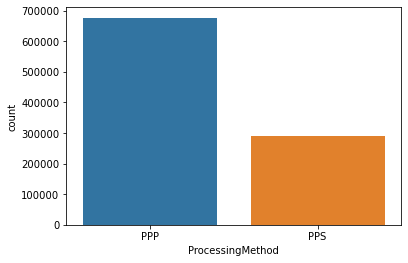

In [38]:
## count the how many records there are in each processing method
sns.countplot(df['ProcessingMethod'])

C:\Users\Vasanth\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

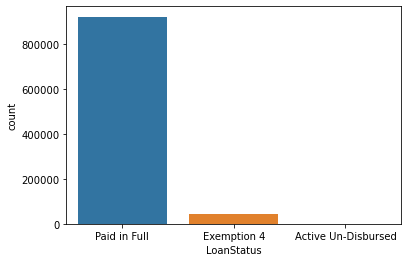

In [40]:
sns.countplot(df['LoanStatus'])

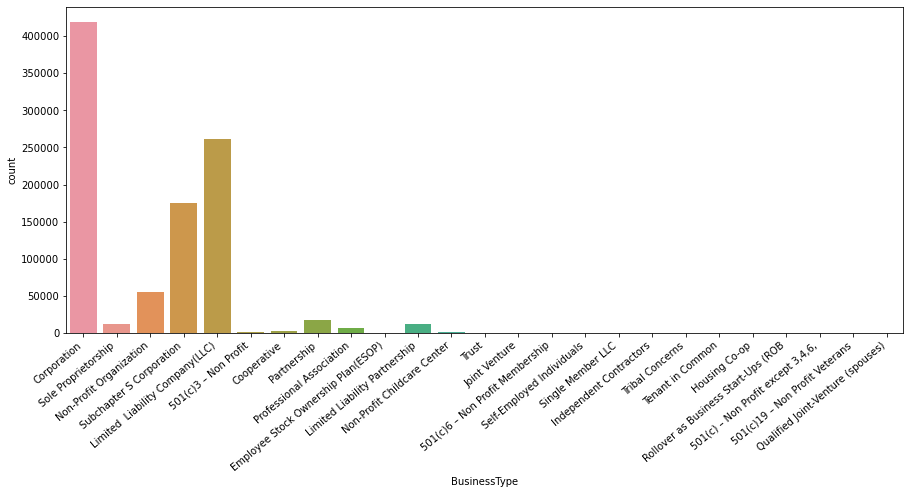

In [41]:
plt.figure(figsize=(15,6)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x="BusinessType", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

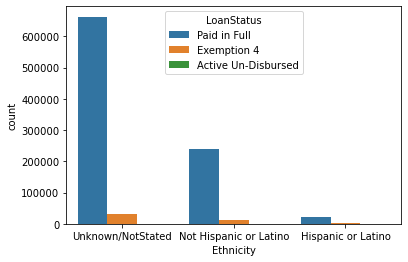

In [42]:
## Plotting Ethnicity Against Loan Status
sns.countplot(x = 'Ethnicity' , hue ='LoanStatus' , data = df)

In [43]:
#cross tabulation
pd.crosstab(df['BorrowerState'],df['Ethnicity'])

Ethnicity,Hispanic or Latino,Not Hispanic or Latino,Unknown/NotStated
BorrowerState,,,
AK,45,692,1924
AL,49,3230,7633
AR,55,1524,4278
AS,0,1,19
AZ,451,3586,11757
CA,5880,36429,88305
CO,464,5059,14220
CT,167,3295,9430
DC,97,910,3392


In [45]:
pd.crosstab( df['BorrowerState'],df['year_approved'])

year_approved,2020,2021
BorrowerState,,
AK,1713,948
AL,7840,3072
AR,4254,1603
AS,18,2
AZ,11314,4480
CA,87334,43280
CO,13413,6330
CT,8585,4307
DC,2798,1601


In [46]:
pd.crosstab(df['Ethnicity'],df['LoanStatus'])

LoanStatus,Active Un-Disbursed,Exemption 4,Paid in Full
Ethnicity,,,
Hispanic or Latino,0,1935,21207
Not Hispanic or Latino,7,11468,239109
Unknown/NotStated,5,31878,662918


In [47]:
## Descriptive Summary
df['CurrentApprovalAmount'].describe()

count    9.685270e+05
mean     5.306225e+05
std      7.378884e+05
min      1.500000e+05
25%      2.004000e+05
50%      2.950000e+05
75%      5.393819e+05
max      1.000000e+07
Name: CurrentApprovalAmount, dtype: float64

<AxesSubplot:xlabel='CurrentApprovalAmount'>

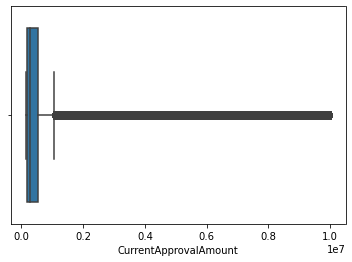

In [48]:
sns.boxplot(x = df['CurrentApprovalAmount'])

<AxesSubplot:xlabel='LoanStatus', ylabel='CurrentApprovalAmount'>

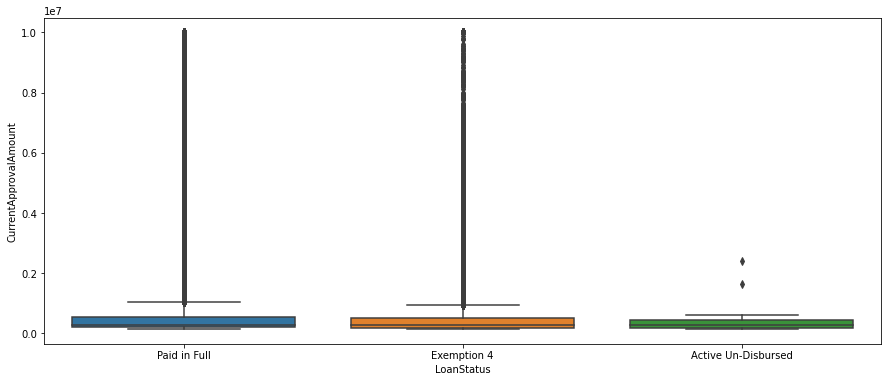

In [49]:
plt.figure(figsize=(15,6)) # this creates a figure 8 inch wide, 4 inch high
sns.boxplot(x="LoanStatus", y="CurrentApprovalAmount", data=df)

C:\Users\Vasanth\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CurrentApprovalAmount', ylabel='Density'>

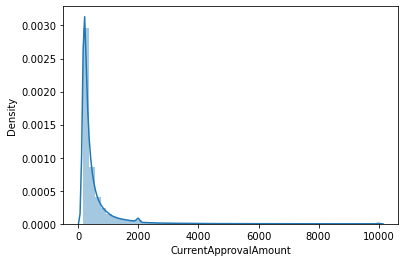

In [50]:
sns.distplot(df['CurrentApprovalAmount']/10**3)

#Deviates from the t or chi distribution.
#Have a positive skewness.
#skewness and kurtosis
#Basically getting the body measure of the above diagram

In [52]:
print("Skewness: %f" % df['CurrentApprovalAmount'].skew())
print("Kurtosis: %f" % df['CurrentApprovalAmount'].kurt())

Skewness: 5.759145
Kurtosis: 48.973853


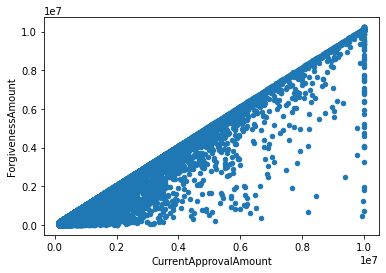

In [53]:
#scatter plot ForgivenessAmount/CurrentApprovalAmount
var = 'ForgivenessAmount'
data = pd.concat([df['CurrentApprovalAmount'], df[var]], axis=1)
data.plot.scatter(x='CurrentApprovalAmount', y=var);

<AxesSubplot:>

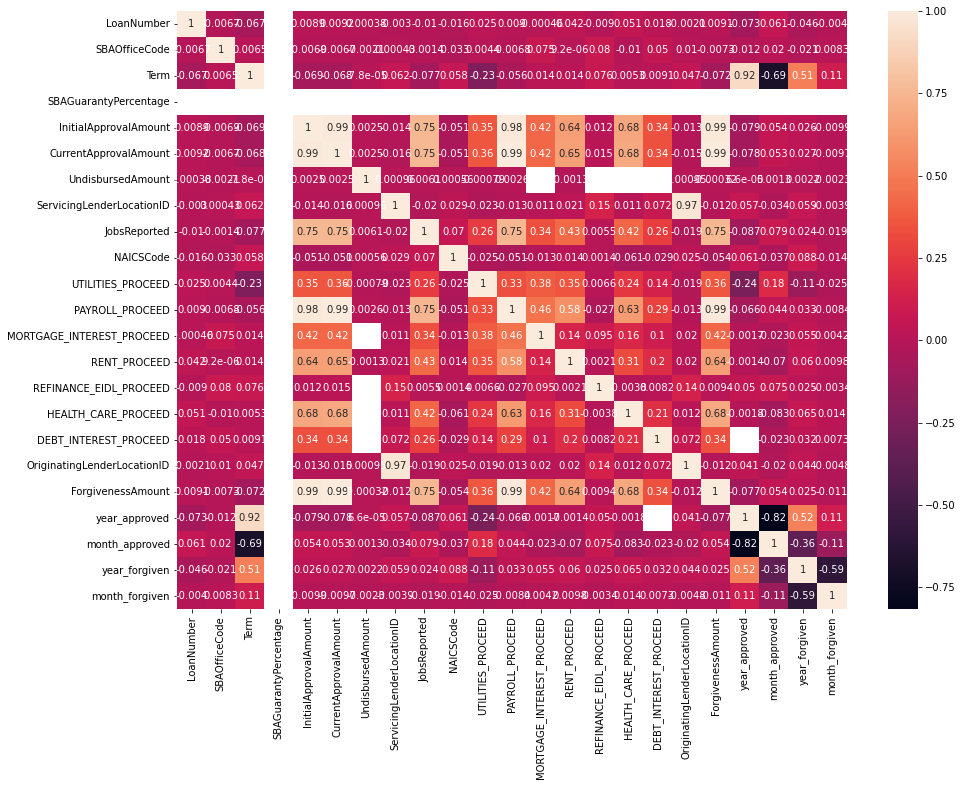

In [54]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(matrix, annot=True)